# **Linear Regression**

# Preprocessing

In [ ]:
!pip install allmetrics

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LinearRegression
from allmetrics.regression import r_squared, mean_absolute_error, mean_squared_error

In [ ]:
dataset=pd.read_csv('/content/Ecommerce Customers -changed.csv')
dataset

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,NaN,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,NaN,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,NaN
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092
...,...,...,...,...,...,...,...,...
495,lewisjessica@craig-evans.com,"4483 Jones Motorway Suite 872\nLake Jamiefurt,...",Tan,33.237660,13.566160,36.417985,3.746573,573.847438
496,katrina56@gmail.com,"172 Owen Divide Suite 497\nWest Richard, CA 19320",PaleVioletRed,34.702529,11.695736,37.190268,3.576526,529.049004
497,dale88@hotmail.com,"0787 Andrews Ranch Apt. 633\nSouth Chadburgh, ...",Cornsilk,32.646777,11.499409,38.332576,4.958264,551.620146
498,cwilson@hotmail.com,"680 Jennifer Lodge Apt. 808\nBrendachester, TX...",Teal,33.322501,12.391423,36.840086,2.336485,456.469510


In [ ]:
print(dataset.shape)
print(dataset.size)

(500, 8)

In [ ]:
dataset.head()

,Email,Address,Avatar,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
0,mstephenson@fernandez.com,"835 Frank Tunnel\nWrightmouth, MI 82180-9605",Violet,34.497268,12.655651,39.577668,NaN,587.951054
1,hduke@hotmail.com,"4547 Archer Common\nDiazchester, CA 06566-8576",DarkGreen,31.926272,11.109461,37.268959,2.664034,392.204933
2,pallen@yahoo.com,"24645 Valerie Unions Suite 582\nCobbborough, D...",Bisque,NaN,11.330278,37.110597,4.104543,487.547505
3,riverarebecca@gmail.com,"1414 David Throughway\nPort Jason, OH 22070-1220",SaddleBrown,34.305557,13.717514,36.721283,3.120179,NaN
4,mstephens@davidson-herman.com,"14023 Rodriguez Passage\nPort Jacobville, PR 3...",MediumAquaMarine,33.330673,12.795189,37.536653,4.446308,599.406092


In [ ]:
dataset.describe()

,Avg. Session Length,Time on App,Time on Website,Length of Membership,Yearly Amount Spent
count,499.000000,500.000000,499.000000,499.000000,499.000000
mean,33.053298,12.052488,37.065623,3.532361,499.148631
std,0.993556,0.994216,1.004842,0.999977,79.308004
min,29.532429,8.508152,33.913847,0.269901,256.670582
25%,32.340848,11.388153,36.353869,2.929280,445.014369
50%,33.085298,11.983231,37.071643,3.532862,498.635599
75%,33.713317,12.753850,37.716878,4.127420,549.069900
max,36.139662,15.126994,40.005182,6.922689,765.518462


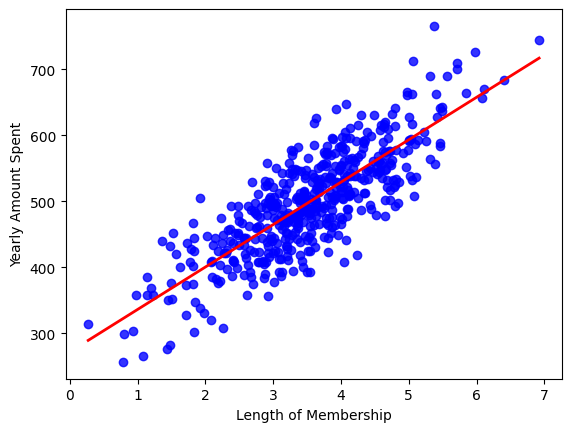

In [ ]:
# regression plot
sns.regplot(x="Length of Membership", y="Yearly Amount Spent", ci=None ,data=dataset, line_kws ={'color':'red', 'linewidth' : 2}, scatter_kws ={'color':'blue'});

In [ ]:
x = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [ ]:
x[:10,:]

array([[34.49726773, 12.65565115, 39.57766802,         nan],
       [31.92627203, 11.10946073, 37.26895887,  2.66403418],
       [        nan, 11.33027806, 37.11059744,  4.1045432 ],
       [34.30555663, 13.71751367, 36.72128268,  3.12017878],
       [33.33067252, 12.79518855, 37.5366533 ,  4.44630832],
       [33.87103788, 12.02692534,         nan,  5.4935072 ],
       [32.0215955 , 11.36634831, 36.68377615,  4.68501725],
       [32.73914294, 12.35195897, 37.37335886,  4.43427343],
       [33.9877729 , 13.38623528, 37.53449734,  3.27343358],
       [31.93654862, 11.81412829, 37.14516822,  3.20280607]])

In [ ]:
y[:10]

array([[587.951054  ],
       [392.2049334 ],
       [487.5475049 ],
       [499.14863083],
       [599.406092  ],
       [637.1024479 ],
       [521.5721748 ],
       [549.9041461 ],
       [570.200409  ],
       [427.1993849 ]])

In [ ]:
imputer_x = SimpleImputer(missing_values=np.nan,strategy='mean') # median, most_frequent, constant (fill_value)
imputer_y = SimpleImputer(missing_values=np.nan,strategy='mean')
# fit method will look for missing values and calulate mean
imputer_x.fit(x) # x[:, 0:3]
imputer_y.fit(y.reshape(-1,1))

# # transform method will replace missign value with calulated value
x=imputer_x.transform(x)
#x=imputer_x.fit_transform(x)
y=imputer_y.transform(y.reshape(-1,1))

In [ ]:
x[:10,:]

array([[34.49726773, 12.65565115, 39.57766802,  3.53236104],
       [31.92627203, 11.10946073, 37.26895887,  2.66403418],
       [33.05329829, 11.33027806, 37.11059744,  4.1045432 ],
       [34.30555663, 13.71751367, 36.72128268,  3.12017878],
       [33.33067252, 12.79518855, 37.5366533 ,  4.44630832],
       [33.87103788, 12.02692534, 37.06562291,  5.4935072 ],
       [32.0215955 , 11.36634831, 36.68377615,  4.68501725],
       [32.73914294, 12.35195897, 37.37335886,  4.43427343],
       [33.9877729 , 13.38623528, 37.53449734,  3.27343358],
       [31.93654862, 11.81412829, 37.14516822,  3.20280607]])

In [ ]:
y[:10]

array([[587.951054  ],
       [392.2049334 ],
       [487.5475049 ],
       [499.14863083],
       [599.406092  ],
       [637.1024479 ],
       [521.5721748 ],
       [549.9041461 ],
       [570.200409  ],
       [427.1993849 ]])

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state = 42) # func returns train and test data.
# It takes dataset and then split size test_size =0.3 means 30% data is for test and rest for training

In [ ]:
x_train[:10,:]

array([[33.87103788, 12.02692534, 37.06562291,  5.4935072 ],
       [33.9257949 , 12.01102188, 36.70105232,  2.75342417],
       [34.55576799, 12.17052542, 39.13109673,  3.66310549],
       [32.1253869 , 11.73386169, 34.89409275,  3.13613272],
       [33.50381038, 11.23341495, 37.21115258,  2.32055025],
       [34.00207092, 11.85468192, 37.49189221,  2.76186193],
       [34.30555663, 13.71751367, 36.72128268,  3.12017878],
       [32.53082944, 12.35460708, 37.12234521,  2.30755242],
       [33.44155304, 11.23596895, 37.05261631,  3.90447938],
       [33.87978429, 12.4955916 , 38.05260975,  4.63932033]])

In [ ]:
x_test[:10,:]

array([[32.07759004, 10.34787695, 39.0451557 ,  3.43455972],
       [32.80869759, 12.81711309, 37.03153922,  3.8515788 ],
       [31.44744649, 10.1016322 , 38.04345265,  4.23829619],
       [32.44952156, 13.45772494, 37.23880567,  2.94141075],
       [31.38958548, 10.99422392, 38.07445242,  3.4288599 ],
       [32.43083858, 13.88727541, 38.38195597,  3.77296903],
       [35.03744996, 11.93593497, 35.78392374,  3.31015035],
       [33.01479222, 11.76117233, 37.57016384,  3.83416967],
       [32.43075793, 11.30623234, 37.68040323,  2.77952072],
       [32.99838766, 10.94684194, 37.64780806,  3.82603062]])

In [ ]:
y_train[:10]

array([637.10244792, 479.23109291, 549.86059046, 457.84769594,
       397.4205841 , 461.62827839, 581.85234404, 420.91615953,
       508.73574095, 616.85152297])

In [ ]:
y_test[:10]

array([401.03313522, 534.7771881 , 418.6027421 , 503.97837905,
       410.06961106, 557.60826205, 538.94197453, 514.33655827,
       408.62018783, 475.01540709])

# Train

In [ ]:
# linear regression algorithm
regressor = LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

# Evaluation

In [ ]:
# predicting the test set results
y_pred = regressor.predict(x_test)

In [ ]:
# evaluate the model by using allmetrics library
print(f'r2 is: {r_squared(y_test,y_pred)}')
print(f'MAE is: {mean_absolute_error(y_test,y_pred)}')
print(f'MSE is: {mean_squared_error(y_test,y_pred)}')

np.float64(0.9799519980966961)